# Exploration des relevés de données des bâtiments 

## Sommaire

* [1 - Traitement des données](#chapter1)
    * [1.1. Traitement des données de 2015](#section_1_1)
    * [1.2. Traitement des données de 2016](#Section_1_2)
    * [1.3. Création d'un dataset unique](#section_1_3)
        * [Traitement du dataset crée](#section_1_3_1)
        * [Suppression des données aberrantes](#section_1_3_2)
        * [Normalisation des modalités](#section_1_3_3)
    * [1.4. Création de nouvelles variables/Feature Engineering](#section_1_4)
    * [1.5. Visualisation du dataset crée](#section_1_5)
 
    
    
* [2 - Analyses descriptives](#chapter2)
    * [2.1. Données géographiques](#section_2_1)
    * [2.2. Analyses univariées](#section_2_2)
    * [2.3. Analyses bivariées](#section_2_3)
    


* [3 - Références bibliographiques](#chapter3)

In [1]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import pingouin as pg

## 1 - Traitement des données <a class="anchor" id="chapter1"></a>

On va commencer par analyser les jeux de données de manière isolée avant de les regrouper en un seul dataset. On commence donc le chargement des données de 2015 et par regarder la manière dont elles sont présentées. 

### 1.1) Traitement des données de 2015 <a class="anchor" id="section_1_1"></a>

In [2]:
# Chargement du fichier de 2015
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [3]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les chaînes de caractères sont écrites en majuscule, on va donc les passer en minuscule avec la première lettre en majuscule. On va aussi s'intéresser aux valeurs manquantes. 

In [4]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

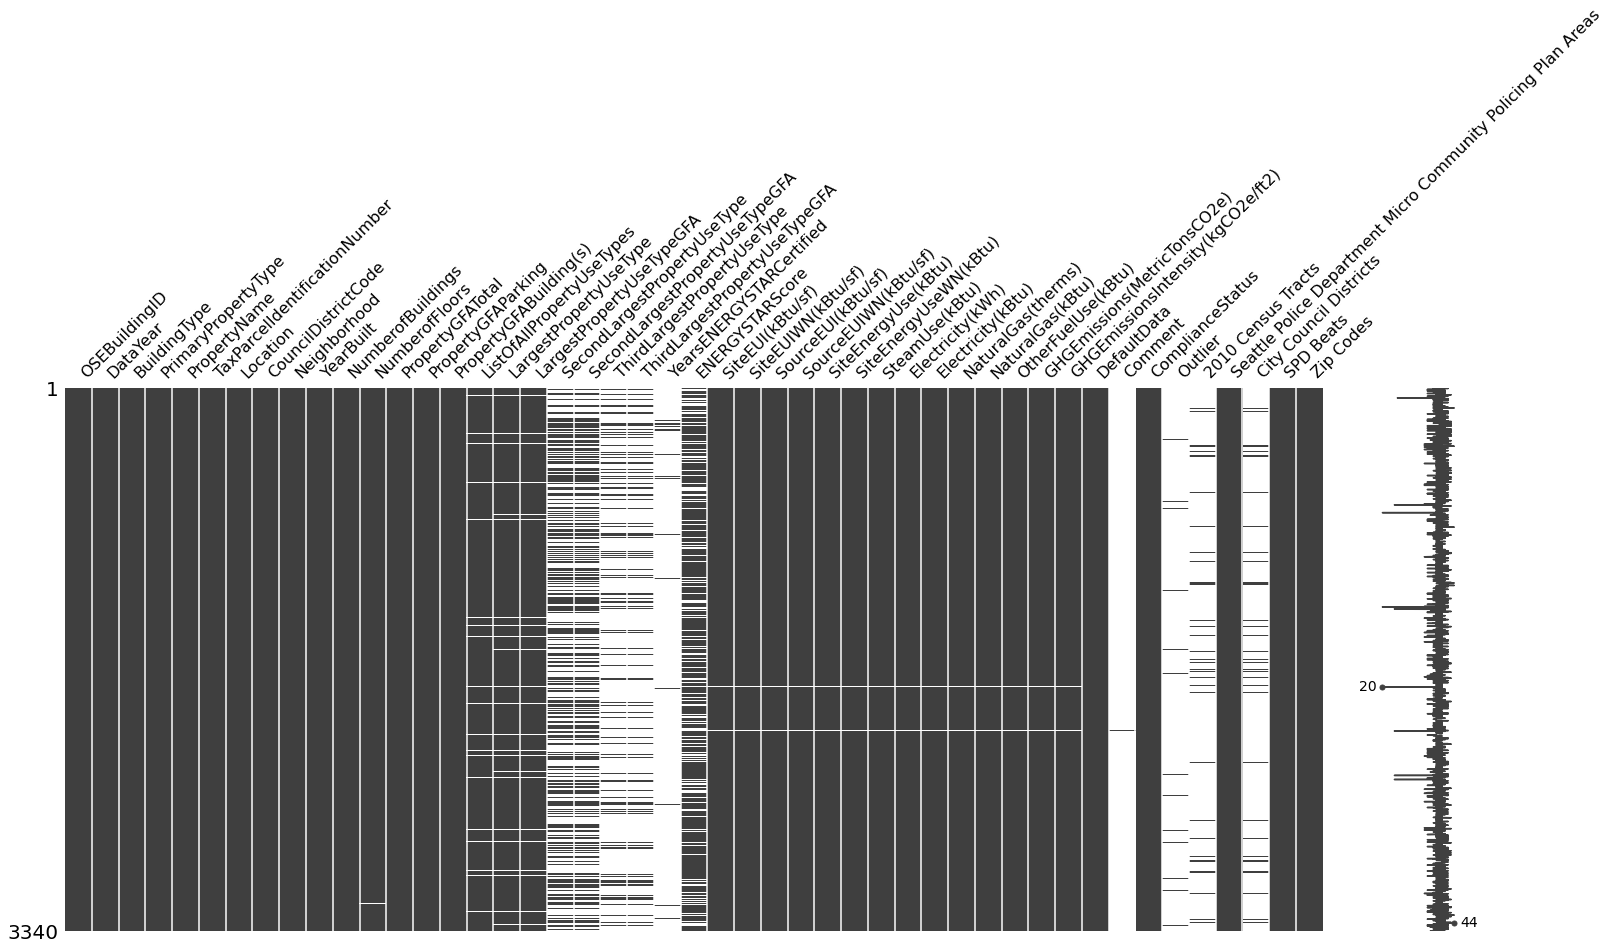

In [5]:
msno.matrix(df_2015);

In [6]:
# Suppression des colonnes avec plus de 50% de valeurs manquantes
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]

In [7]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

### 1.2) Traitement des données de 2016 <a class="anchor" id="section_1_2"></a>

Les données de 2016 sont traitées de la même manière que celle de 2015 pour permettre de pouvoir réunir les deux datasets ensemble. Les colonnes supprimées pour le dataset de 2015 ont été supprimés pour celui de 2016. 

In [8]:
# Chargement du fichier de 2016
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


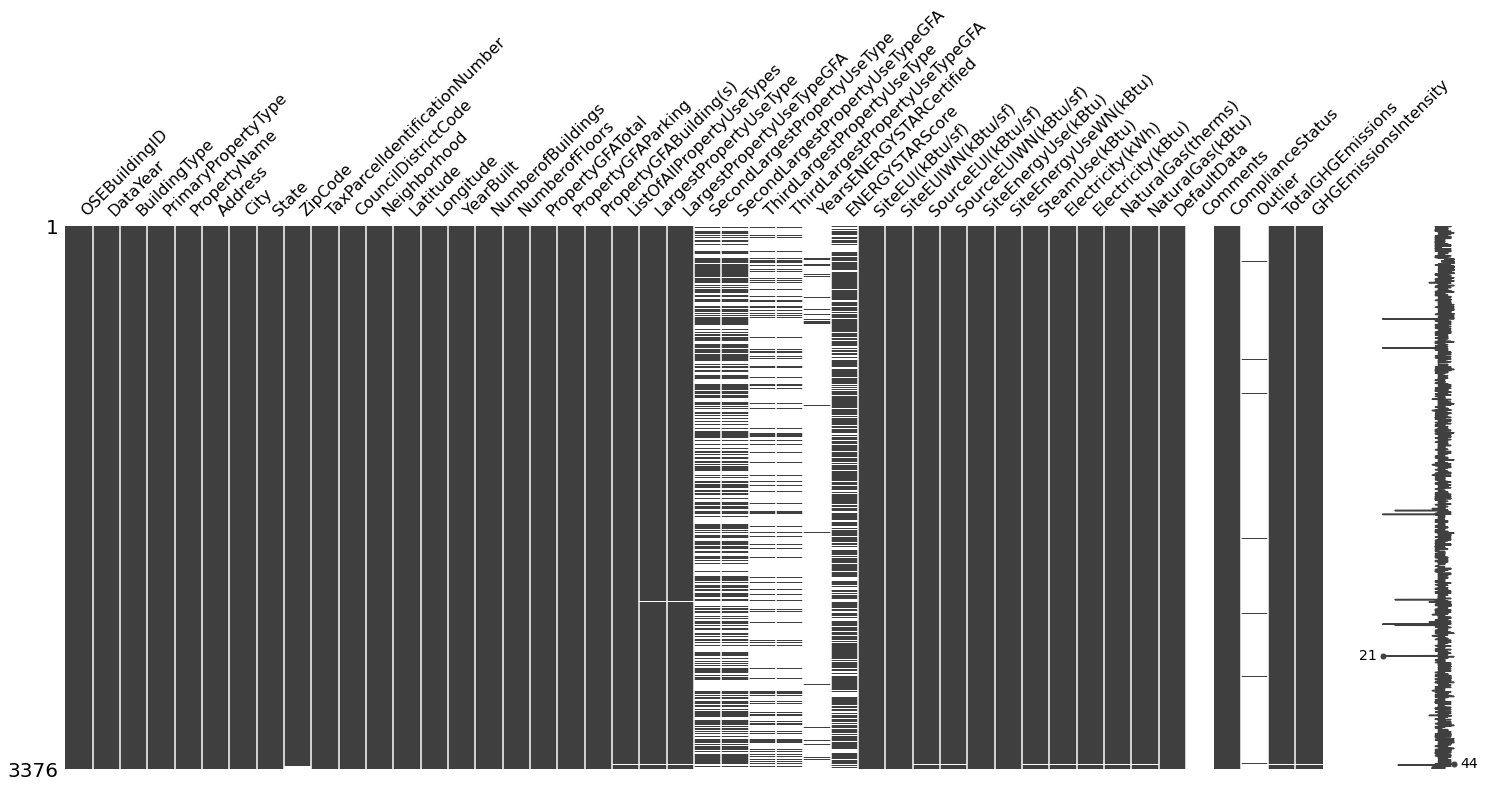

In [9]:
msno.matrix(df_2016);

In [10]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [11]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]

In [12]:
# Création d'un dataframe pour ajouter les latitudes et longitudes des bâtiments en fonction de leur ID
coord = df_2016[["OSEBuildingID", "Latitude", "Longitude"]]
df_2015 = df_2015.merge(coord, on="OSEBuildingID")

### 1.3) Création d'un dataset avec les données de 2015 & 2016 <a class="anchor" id="section_1_3"></a>

On effectue une jointure entre nos deux datasets pour n'en créer qu'un seul. 

In [13]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,Mayflower park hotel,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,Downtown,1927,...,No,Compliant,14.0,31.0,18081.0,47.61220,-122.33799,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,Paramount hotel,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,Downtown,1996,...,No,Compliant,14.0,31.0,18081.0,47.61317,-122.33393,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,Westin hotel,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,Downtown,1969,...,Yes,Compliant,56.0,31.0,18081.0,47.61393,-122.33810,NaN,NaN,NaN


#### 1.3.1) Traitement du dataset crée <a class="anchor" id="section_1_3_1"></a>

Certains bâtiments ont une vocation de résidence. On va donc se concentrer sur la conservation de quatre types de bâtiments qui n'ont pas vocation à servir de résidence. 

In [14]:
# Conservation des bâtiments non résidentiel
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

Certaines chaînes de caractères ne sont pas normalisées et contiennent des différences, on va donc harmoniser ces chaînes de caractères pour éviter d'avoir deux catégories pour la même modalité. 

In [15]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [16]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

Enfin, l'observation des différentes modalités du type de propriétés primaires, on remarque qu'il reste des bâtiments à caractère résidentiel. On supprime donc ces entrées pour ne conserver que les bâtiments non-résidentiels.

In [17]:
# retrait des propriétés qui sont résidentiels
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

#### 1.3.2) Suppression des données aberrantes <a class="anchor" id="section_1_3_2"></a>

On va regarder s'il n'y a pas des valeurs négatives dans le dataset crée.

In [18]:
df.loc[df['Electricity(kBtu)'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6490,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt center,7234600195,NaN,3,Central,2013,...,False,Compliant,NaN,NaN,98122.0,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA


Après recherche, il ne s'agit pas d'une erreur mais d'un bâtiment à énergie positive. Il s'agit bien d'un bâtiment non-résidentiel qui héberge des bureaux. Cet immeuble possède des panneaux solaires pour s'alimenter en électricité et aussi produire de l'électricité verte qui pourra être acheminé à des bâtiments de la ville. Il possède aussi des puits de géothermie, est construit avec des matériaux respectueux de l'environnement et a une orientation qui lui permet de profiter de 82% d'ensoleillement. 


Pour plus d'informations : [Site du bullit center](!https://bullittcenter.org/).

Par précaution, on supprime donc toutes les valeurs énergétiques qui sont inférieures à 0 pour ne pas perturber la suite de l'analyse et la création du modèle. On supprime aussi les entrées où la superficie totale est négative. 

In [19]:
df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["GHGEmissionsIntensity"] > 0]
df = df.loc[df["PropertyGFATotal"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

On finit par supprimer les informations non utilisées et/ou redondantes de notre dataset.

In [20]:
# Suppression des colonnes redondantes et non utilisées dans la suite
df.drop(["PropertyName","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType",
         "DefaultData", "ComplianceStatus", "State", 
         "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "ZipCode"], axis=1, inplace=True)

In [21]:
df.shape

(3245, 24)

#### 1.3.3) Harmonisation des modalités <a class="anchor" id="section_1_3_3"></a>

Certains bâtiments ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom. 

In [22]:
# Regroupement des établissements scolaires dans une catégorie unique
property_use = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [23]:
# Regroupement des bureaux dans une catégorie unique
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

On regarde si la consommation d'énergie a baissé entre l'année 2015 et 2016. On fait de même avec les émissions de gaz à effets de serre. 

In [24]:
energy_2015 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2015)].mean()
energy_2016 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2016)].mean()
diff_energy = energy_2016 - energy_2015

print("Consommation d'énergie en 2015: " + str(energy_2015) + " kBtu")
print("Consommation d'énergie en 2016: " + str(energy_2016) + " kBtu")
print("Différence de consommation entre 2015 et 2016: " + str(diff_energy) + " kBtu")

Consommation d'énergie en 2015: 7685453.08915212 kBtu
Consommation d'énergie en 2016: 8546078.813653013 kBtu
Différence de consommation entre 2015 et 2016: 860625.7245008927 kBtu


In [25]:
co2_2015 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2015)].mean()
co2_2016 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2016)].mean()
diff_co2 = co2_2016 - co2_2015


print("Emissions de CO2 en 2015: " + str(co2_2015) + " MetricTonsCO2e")
print("Emissions de CO2 en 2016: " + str(co2_2016) + " MetricTonsCO2e")
print("Différence de consommation entre 2015 et 2016: " + str(diff_co2) + " MetricTonsCO2e")

Emissions de CO2 en 2015: 167.65364089775582 MetricTonsCO2e
Emissions de CO2 en 2016: 186.88524070688618 MetricTonsCO2e
Différence de consommation entre 2015 et 2016: 19.23159980913036 MetricTonsCO2e


### 1.4) Création de nouvelles variables/Feature Engineering <a class="anchor" id="section_1_4"></a>

On transforme la variable "Nombre d'étages" et "Nombre de bâtiments" en variable catégorielle. 


In [26]:
# Simplification de la variable "Number of Floors"

def nbFloors(row):
    if row["NumberofFloors"] == 0:
        val="0f"
    elif row['NumberofFloors'] == 1:
        val="1f"
    else:
        val="2+f"
    return val

df['NbofFloors'] = df.apply(nbFloors, axis=1)

In [27]:
# Simplification de la variable "Number of Buildings"

def nbBuilding(row):
    if row["NumberofBuildings"] == 0:
        val="0b"
    elif row['NumberofBuildings'] == 1:
        val="1b"
    else:
        val="2+b"
    return val

df['NbofBuildings'] = df.apply(nbBuilding, axis=1)

On ajoute une variable "Age" qui sera plus précise que l'année de construction.

In [28]:
df["Age"] = df["DataYear"] - df["YearBuilt"]

In [29]:
# Simplification de la variable "Age"
df["Bins_Age"] = pd.qcut(df["Age"], 4, labels=["Very Old", "Old", "Medium", "Recent"])

On peut aussi ajouter une variable qui correspond aux "degree-days" (Degré Jour Unifié en France). On a donc récupéré les deux valeurs de ces températures sur ce site : [energystar.gov](!https://portfoliomanager.energystar.gov/pm/degreeDaysCalculator)

In [30]:
def degreeDaysH(row):
    if row["DataYear"] == 2015:
        val = 4005
    else:
        val = 4093
    return val

def degreeDaysC(row):
    if row["DataYear"] == 2015:
        val = 409
    else:
        val = 252
    return val

df['degreeDaysH'] = df.apply(degreeDaysH, axis=1)
df['degreeDaysC'] = df.apply(degreeDaysC, axis=1)

On va créer une variable "Has a Parking".

In [31]:
def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

df['HasParking'] = df.apply(HasParking, axis=1)

On va créer des clusters à partir des points de géolocalisation (latitude et longitude) pour créer des zones.

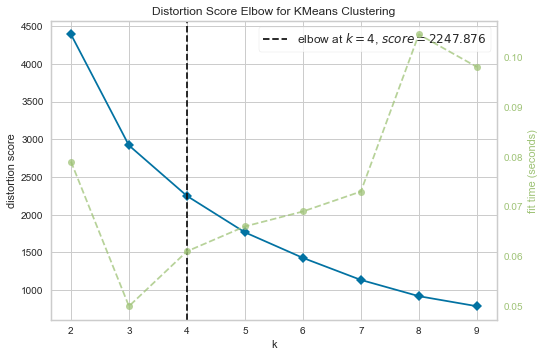

In [32]:
# ELbow method pour déterminer le nombre de clusters optimale

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X = np.abs(df[["Latitude", "Longitude"]])
X_scaled = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k =(2, 10))
visualizer.fit(X_scaled)
visualizer.show();

In [33]:
# Calcul du K-Means et affectation du cluster à chaque bâtiment
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

clusters = pd.DataFrame(pred, index=df["OSEBuildingID"]).reset_index()
clusters.columns = ["OSEBuildingID", "Clusters"]
df = pd.merge(df, clusters, on="OSEBuildingID")
df.drop_duplicates(inplace=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,Address,City,NbofFloors,NbofBuildings,Age,Bins_Age,degreeDaysH,degreeDaysC,HasParking,Clusters
0,1,2015,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,NaN,NaN,2+f,1b,88,Recent,4005,409,No,0
2,1,2016,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,405 Olive way,Seattle,2+f,1b,89,Recent,4093,252,No,0
4,2,2015,NonResidential,Hotel,Downtown,1996,1.0,11.0,103566,15064,...,NaN,NaN,2+f,1b,19,Very Old,4005,409,Yes,0


In [34]:
# Paramétrage visuel
sns.set_theme(style="ticks", palette="Pastel2")

### 1.5) Visualisation du dataset obtenu <a class="anchor" id="section_1_5"></a>

In [35]:
# Suppression des colonnes non utilisées
df.drop(["OSEBuildingID", "Address", "DataYear", "BuildingType", "PropertyGFABuilding(s)", "PropertyGFAParking", "SourceEUIWN(kBtu/sf)", "SteamUse(kBtu)",
         "Electricity(kBtu)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", "GHGEmissionsIntensity", "City"], axis=1, inplace=True)

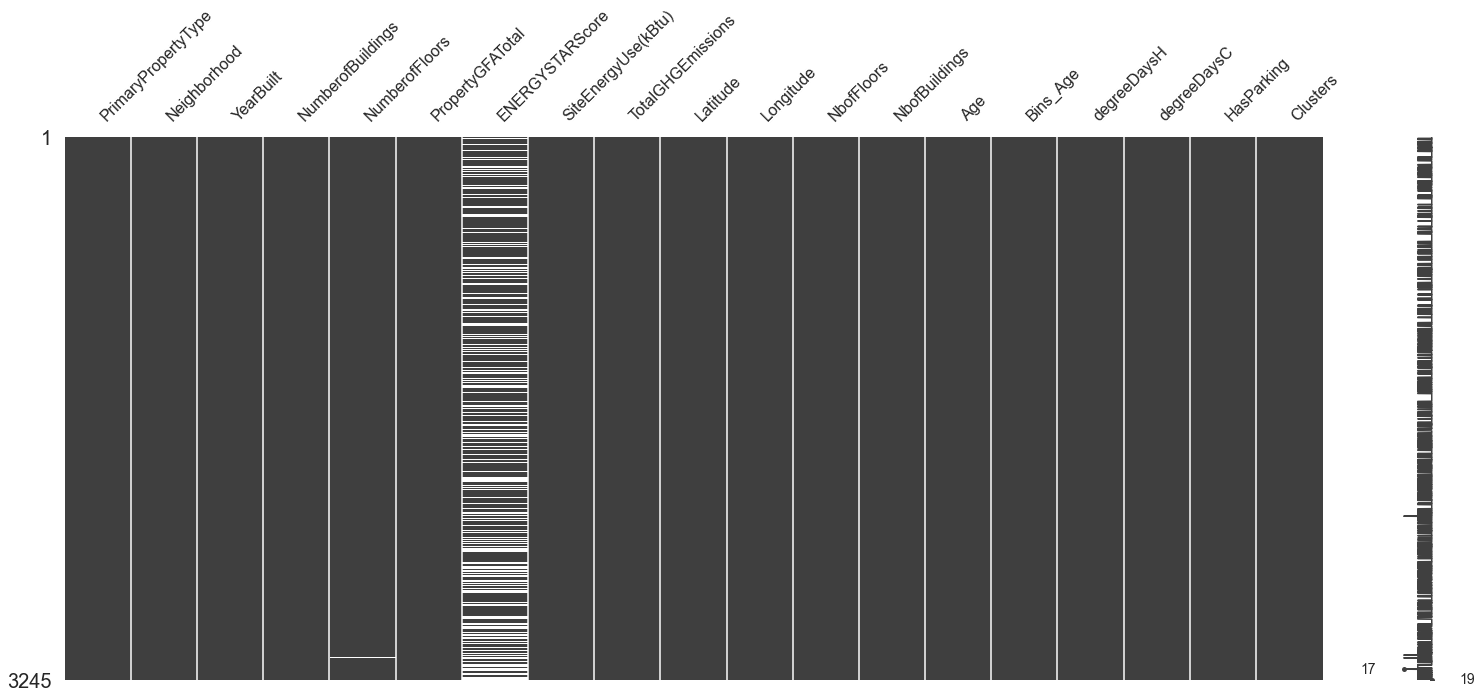

In [36]:
msno.matrix(df);

In [37]:
df.to_csv("datasets/benchmark_total.csv", index=False)

Maintenant que nos données ont été traités et nettoyés, on va sauvegarder ce dataset pour la création du modèle. Dans la suite de ce notebook, on va pouvoir faire l'analyse exploratoire de nos données. 

## 2 - Analyse exploratoire <a class="anchor" id="chapter2"></a>

In [38]:
df.shape

(3245, 19)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 6410
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PrimaryPropertyType  3245 non-null   object  
 1   Neighborhood         3245 non-null   object  
 2   YearBuilt            3245 non-null   int64   
 3   NumberofBuildings    3245 non-null   float64 
 4   NumberofFloors       3237 non-null   float64 
 5   PropertyGFATotal     3245 non-null   int64   
 6   ENERGYSTARScore      2188 non-null   float64 
 7   SiteEnergyUse(kBtu)  3245 non-null   float64 
 8   TotalGHGEmissions    3245 non-null   float64 
 9   Latitude             3245 non-null   float64 
 10  Longitude            3245 non-null   float64 
 11  NbofFloors           3245 non-null   object  
 12  NbofBuildings        3245 non-null   object  
 13  Age                  3245 non-null   int64   
 14  Bins_Age             3245 non-null   category
 15  degreeDaysH          

###  2.1) Données géographiques <a class="anchor" id="section_2_1"></a>

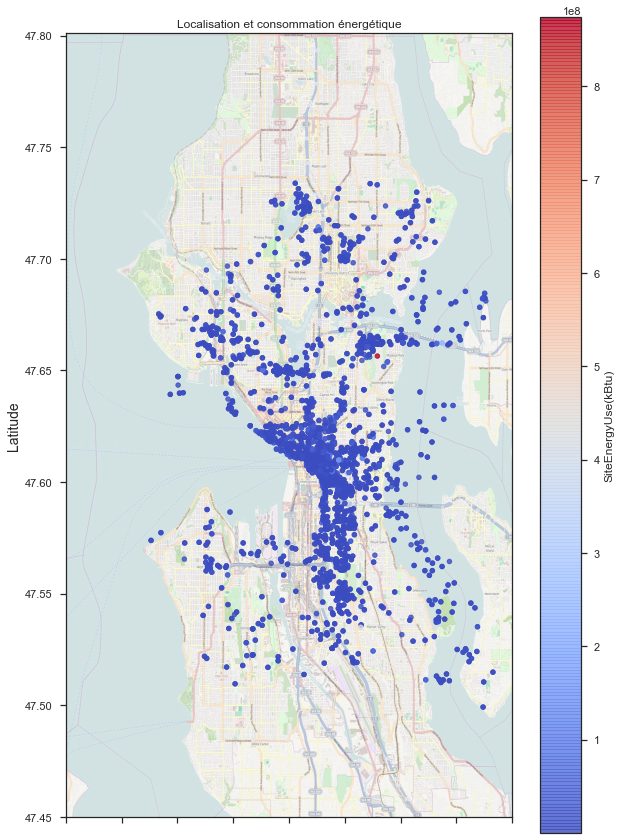

In [40]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")

plt.show()

On observe une concentration de bâtiments non-résidents dans le centre-ville de Seattle. Cela s'explique par le fait que beaucoup de bâtiments non-résidentiels sont des bureaux. Les bâtiments qui se situent en dehors du centre-ville vont être des entrepôts, des campus ou encore des hôpitaux.

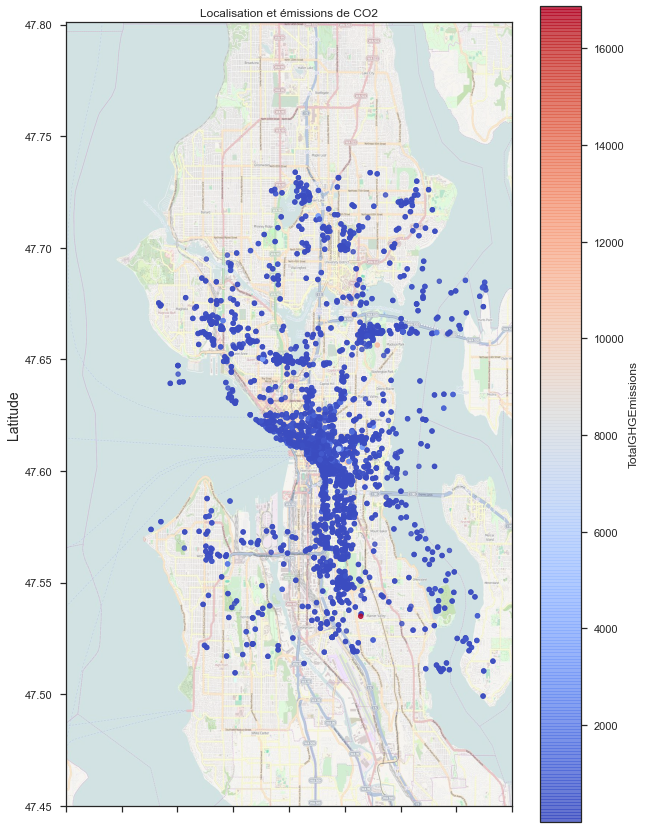

In [41]:
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="TotalGHGEmissions", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et émissions de CO2")

plt.show()

In [42]:
df["Clusters"] = df["Clusters"].astype("int64")

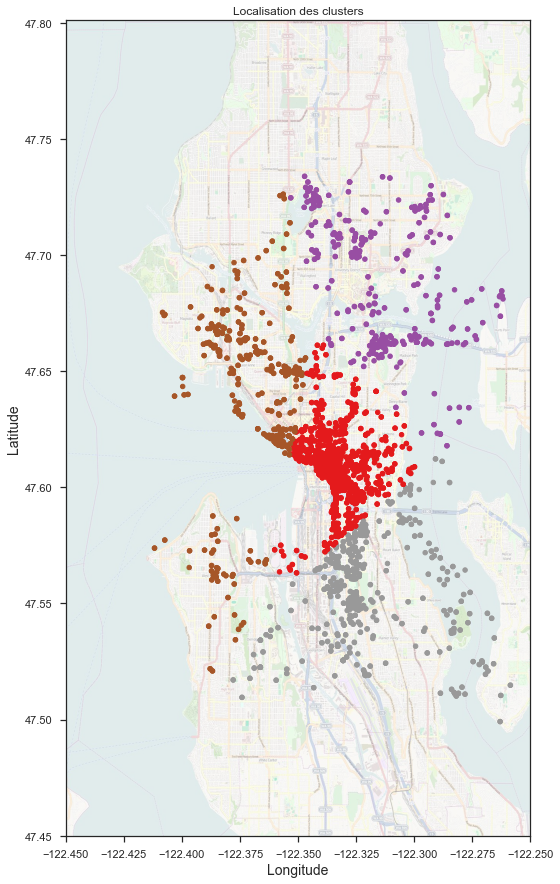

In [43]:
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 1, c="Clusters", colorbar=False, cmap=plt.get_cmap("Set1"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.4)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation des clusters")

plt.show()

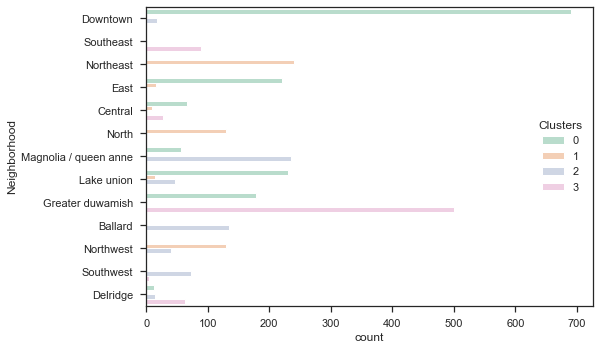

In [44]:
sns.countplot(y="Neighborhood", hue="Clusters", data=df)
plt.show()

La répartition des bâtiments est la même que pour la consommation d'énergie.

### 2.2) Analyses univariées <a class="anchor" id="section2_2"></a>

In [45]:
# Séparation des variables catégorielles et numériques
cat_var = ["PrimaryPropertyType", "Neighborhood", "HasParking", "Bins_Age",
           "NumberofBuildings", "NumberofFloors", "NbofBuildings", "NbofFloors", "Clusters"]

num_var = ["YearBuilt","ENERGYSTARScore", "PropertyGFATotal",
           "SiteEnergyUse(kBtu)", "TotalGHGEmissions", "Age"]

- Distribution des variables catégorielles

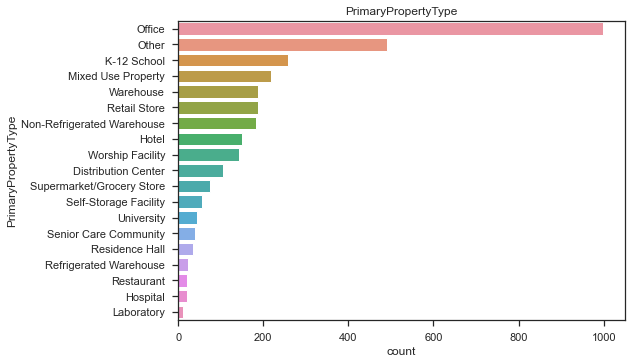

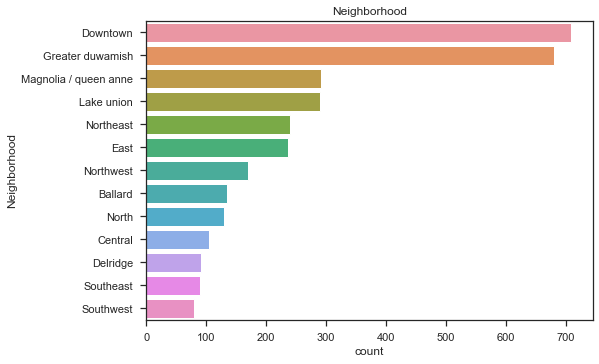

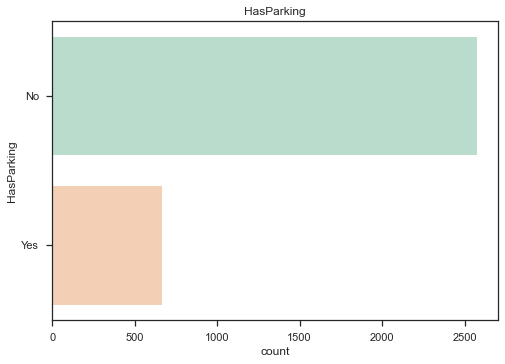

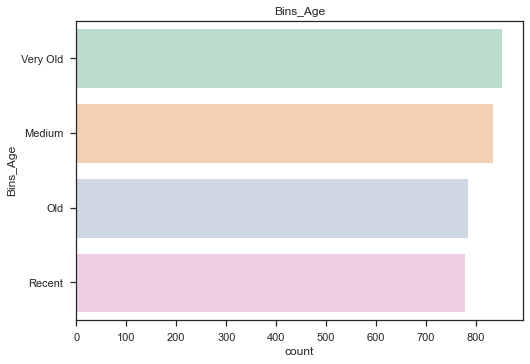

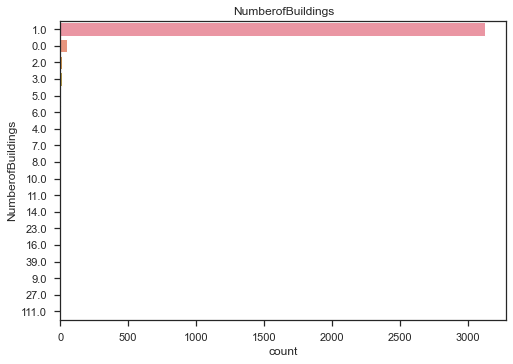

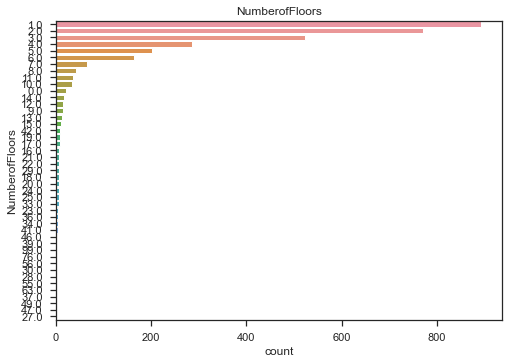

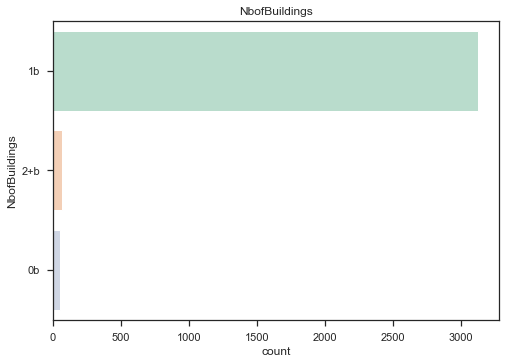

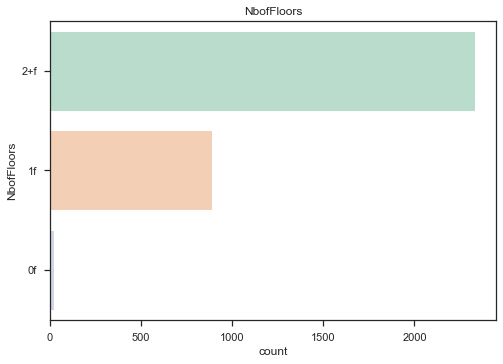

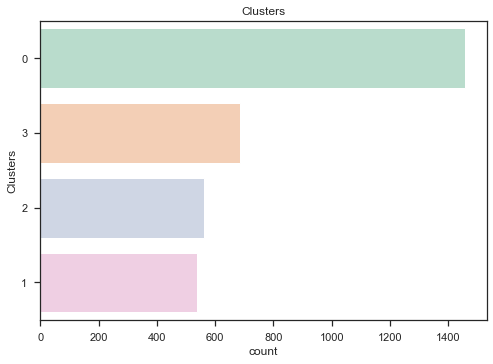

In [46]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

- Distribution des variables quantitatives

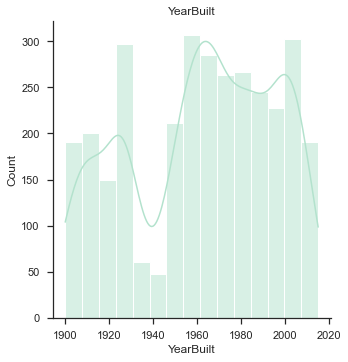

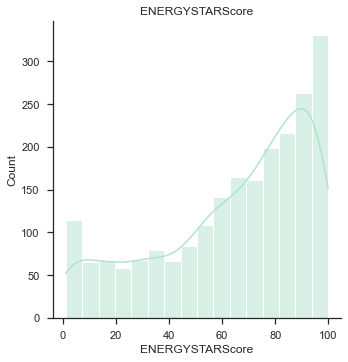

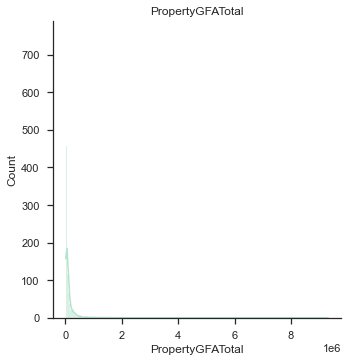

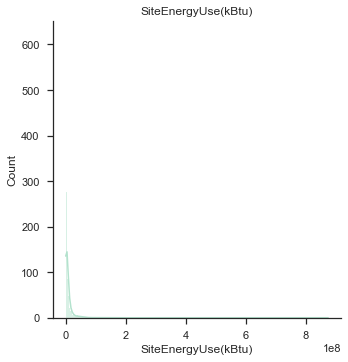

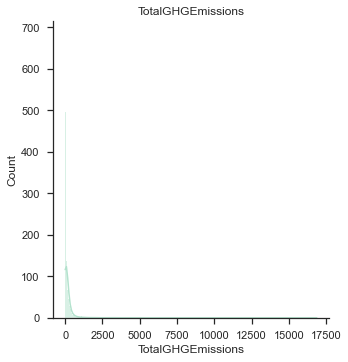

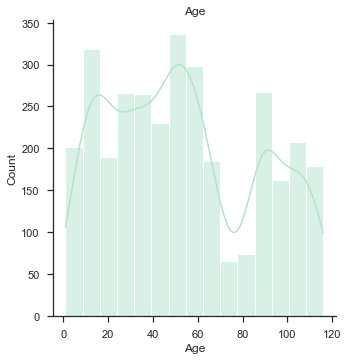

In [47]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

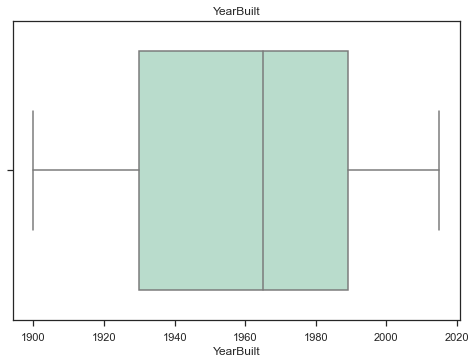

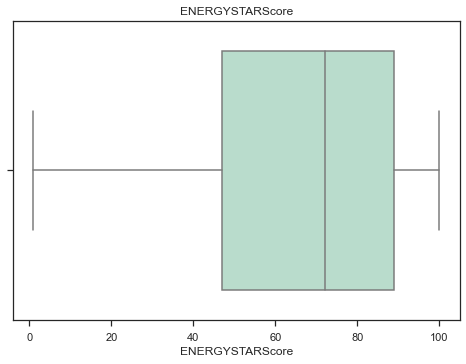

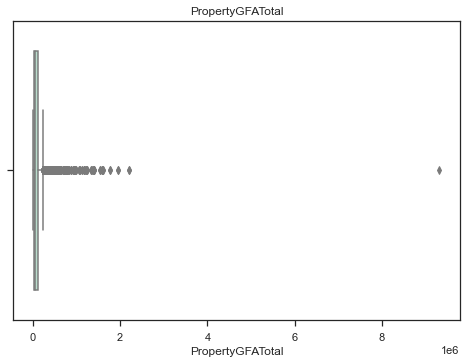

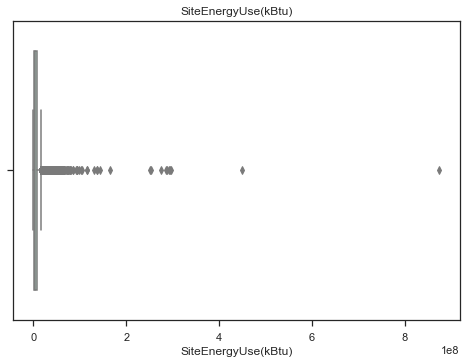

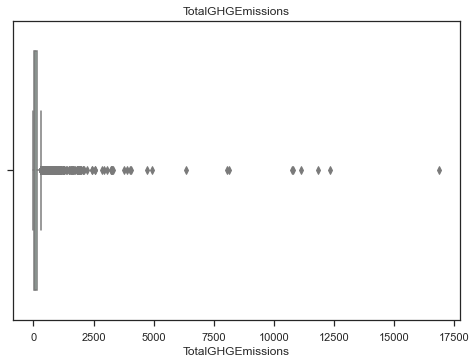

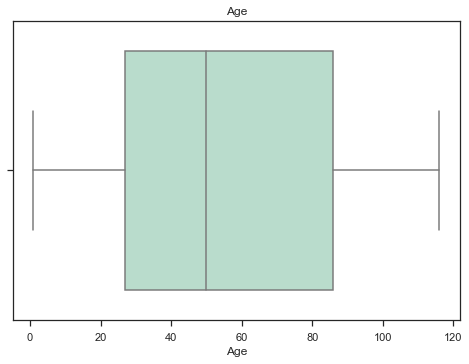

In [48]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [49]:
pg.normality(df,method="normaltest")

,W,pval,normal
YearBuilt,1000.698055,5.025489e-218,False
NumberofBuildings,9400.933045,0.000000e+00,False
NumberofFloors,3748.278115,0.000000e+00,False
PropertyGFATotal,6758.980722,0.000000e+00,False
ENERGYSTARScore,222.624990,4.545668e-49,False
SiteEnergyUse(kBtu),6792.366168,0.000000e+00,False
TotalGHGEmissions,6123.511109,0.000000e+00,False
Latitude,37.422525,7.478283e-09,False
Longitude,45.549580,1.285388e-10,False
Age,1000.395005,5.847697e-218,False


In [50]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


Nos données ne semblent pas suivre une loi normale et l'homogénéité des variances n'est pas respectée. 

In [51]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,degreeDaysH,degreeDaysC,Clusters
count,3245.000000,3245.000000,3237.000000,3.245000e+03,2188.000000,3.245000e+03,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000
mean,1961.757473,1.118028,4.153846,1.161296e+05,64.744973,8.120672e+06,177.379082,47.615853,-122.332985,53.748228,4049.501695,329.604931,1.145763
std,32.630012,2.241561,6.617890,2.523632e+05,28.564623,2.533537e+07,666.970313,0.048114,0.024470,32.631841,44.003920,78.506995,1.202655
min,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,4.429350e+04,0.310000,47.499170,-122.411820,1.000000,4005.000000,252.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.949800e+04,47.000000,1.245924e+06,20.120000,47.585280,-122.343320,27.000000,4005.000000,252.000000,0.000000
50%,1965.000000,1.000000,2.000000,4.924300e+04,72.000000,2.551022e+06,49.580000,47.612300,-122.333000,50.000000,4093.000000,252.000000,1.000000
75%,1989.000000,1.000000,4.000000,1.060000e+05,89.000000,6.994740e+06,139.500000,47.649320,-122.321853,86.000000,4093.000000,409.000000,2.000000
max,2015.000000,111.000000,99.000000,9.320156e+06,100.000000,8.739237e+08,16870.980000,47.733870,-122.258640,116.000000,4093.000000,409.000000,3.000000


In [52]:
df.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      4868.863000
Laboratory                     827.916364
University                     745.459545
Hotel                          400.655235
Senior Care Community          378.283333
Mixed Use Property             233.334037
Supermarket/Grocery Store      227.941600
Other                          215.582796
Restaurant                     172.655238
Office                         112.419910
K-12 School                     91.969302
Retail Store                    88.916150
Residence Hall                  88.334722
Distribution Center             50.105472
Warehouse                       42.494492
Worship Facility                42.007535
Non-Refrigerated Warehouse      40.216848
Refrigerated Warehouse          36.185000
Self-Storage Facility           23.674727
Name: TotalGHGEmissions, dtype: float64

In [53]:
df.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                      1.360147e+08
University                    3.816379e+07
Laboratory                    2.620197e+07
Hotel                         1.227962e+07
Senior Care Community         1.170678e+07
Mixed Use Property            1.009042e+07
Supermarket/Grocery Store     9.949897e+06
Other                         9.816374e+06
Office                        8.414736e+06
Restaurant                    4.944760e+06
Retail Store                  4.906953e+06
Refrigerated Warehouse        3.665475e+06
Residence Hall                3.138390e+06
K-12 School                   3.064561e+06
Distribution Center           2.801173e+06
Warehouse                     1.961577e+06
Non-Refrigerated Warehouse    1.739336e+06
Worship Facility              1.179291e+06
Self-Storage Facility         9.281363e+05
Name: SiteEnergyUse(kBtu), dtype: float64

In [54]:
df.groupby("Neighborhood")["TotalGHGEmissions"].mean().sort_values(ascending=False)

Neighborhood
East                     473.630890
Northeast                226.510208
Downtown                 218.467377
Lake union               191.074310
Central                  167.191538
Northwest                147.096941
Southwest                142.147875
Magnolia / queen anne    124.282671
Southeast                112.768315
Ballard                  107.056593
Delridge                  98.790110
Greater duwamish          94.169324
North                     89.767674
Name: TotalGHGEmissions, dtype: float64

In [55]:
df.groupby("Neighborhood")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

Neighborhood
East                     1.415823e+07
Downtown                 1.234838e+07
Northeast                1.083887e+07
Lake union               1.001955e+07
Central                  6.375709e+06
Magnolia / queen anne    5.887908e+06
Northwest                5.780207e+06
Southwest                4.657378e+06
Greater duwamish         4.559938e+06
Delridge                 4.461552e+06
Ballard                  4.274385e+06
North                    4.262623e+06
Southeast                4.235852e+06
Name: SiteEnergyUse(kBtu), dtype: float64

### 2.3) Analyses bivariées <a class="anchor" id="section_2_3"></a>

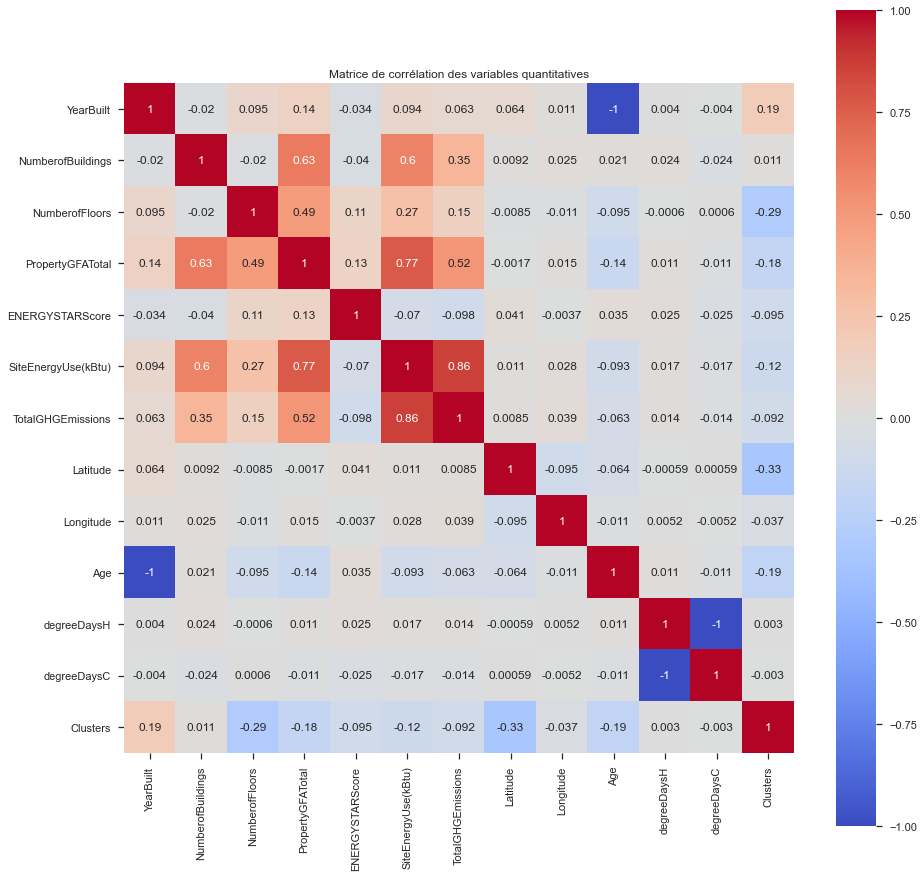

In [56]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

On observe une forte corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre. 

In [57]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)    1.000000
TotalGHGEmissions      0.863835
PropertyGFATotal       0.770894
NumberofBuildings      0.603083
NumberofFloors         0.272045
YearBuilt              0.093553
Longitude              0.027913
degreeDaysH            0.016986
Latitude               0.011338
degreeDaysC           -0.016986
ENERGYSTARScore       -0.069854
Age                   -0.093288
Clusters              -0.120135
Name: SiteEnergyUse(kBtu), dtype: float64

La superficie des propriétés et le nombre de bâtiments sont très fortement corrélés avec la consommation d'énergie. 

In [58]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions      1.000000
SiteEnergyUse(kBtu)    0.863835
PropertyGFATotal       0.519243
NumberofBuildings      0.346600
NumberofFloors         0.152636
YearBuilt              0.062796
Longitude              0.038825
degreeDaysH            0.014418
Latitude               0.008484
degreeDaysC           -0.014418
Age                   -0.062572
Clusters              -0.091538
ENERGYSTARScore       -0.098105
Name: TotalGHGEmissions, dtype: float64

La superficie des propriétés et le nombre de bâtiments sont moyennement corrélés avec la consommation d'énergie. 

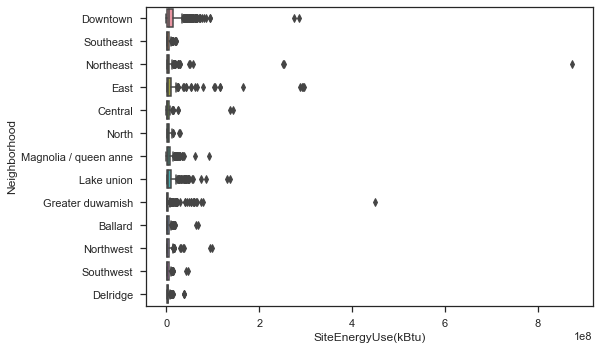

In [59]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", data=df)
plt.show()

In [60]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,3232,5.659972,1.012746e-09,0.020582


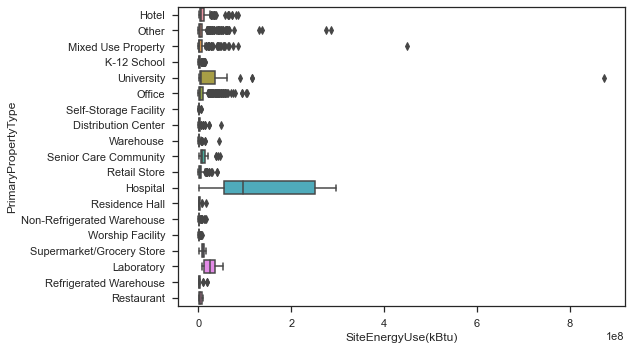

In [61]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.show()

In [62]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,3226,44.4093,2.408877e-140,0.198582


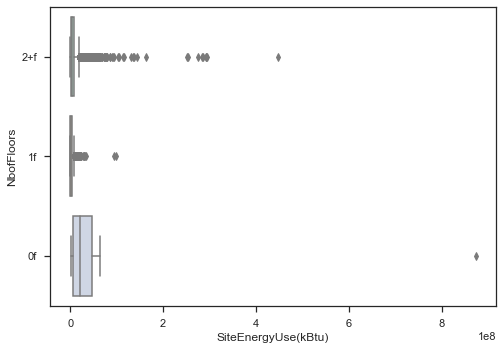

In [63]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofFloors", data=df)
plt.show()

In [64]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,3242,73.844876,4.351213e-32,0.04357


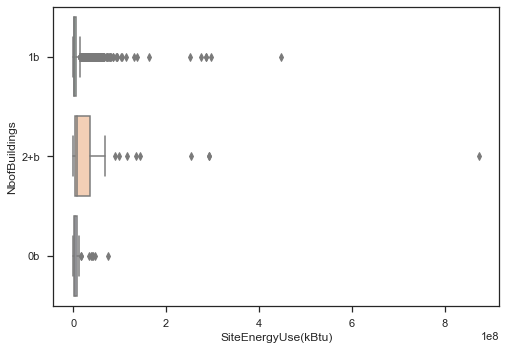

In [65]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="NbofBuildings", data=df)
plt.show()

In [66]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,3242,83.904304,2.968626e-36,0.049213


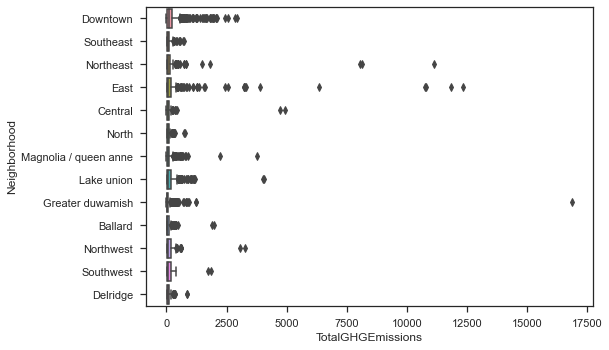

In [67]:
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()

In [68]:
pg.anova(data=df, dv="TotalGHGEmissions", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,3232,5.899496,3.018303e-10,0.021435


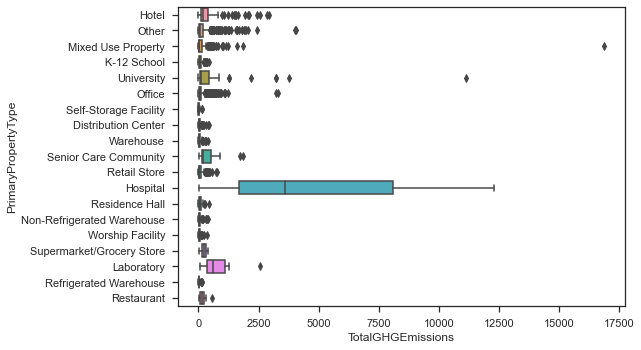

In [69]:
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.show()

In [70]:
pg.anova(data=df, dv="TotalGHGEmissions", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,18,3226,92.270576,2.447782e-274,0.339864


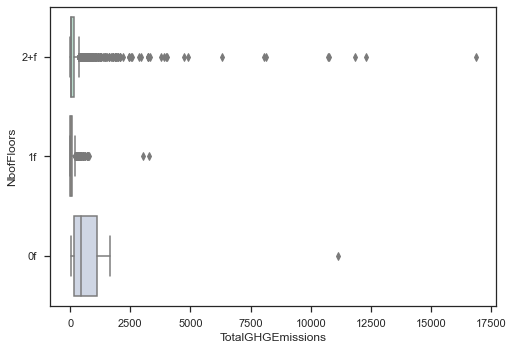

In [71]:
sns.boxplot(x="TotalGHGEmissions", y="NbofFloors", data=df)
plt.show()

In [72]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofFloors")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofFloors,2,3242,29.17381,2.771019e-13,0.017679


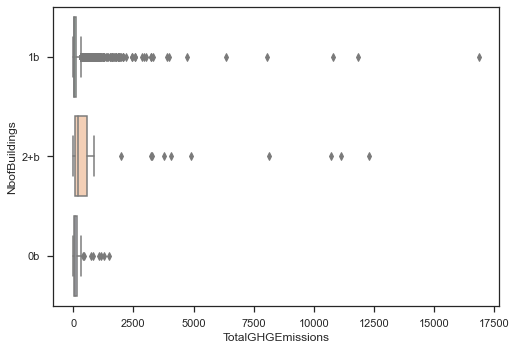

In [73]:
sns.boxplot(x="TotalGHGEmissions", y="NbofBuildings", data=df)
plt.show()

In [74]:
pg.anova(data=df, dv="TotalGHGEmissions", between="NbofBuildings")

,Source,ddof1,ddof2,F,p-unc,np2
0,NbofBuildings,2,3242,78.875108,3.566866e-34,0.046401


## 3) Références bibliographiques et définitions <a class="anchor" id="chapter3"></a>

**Définitions**
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

**Sources :**

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)